# Tensor operation

In [8]:
import torch
import numpy as np

## 텐서의 타입(type)
`.type()` 명령어로 텐서의 타입을 조회할 수 있다.
https://pytorch.org/docs/stable/tensors.html



In [2]:
# 실수형 텐서
a = torch.FloatTensor(np.array([[1, 2, 3], 
                                [4, 5, 6]]))

# 정수형 텐서
b = torch.LongTensor(np.array([[1, 2, 3], 
                               [4, 5, 6]]))

# 8 bit 정수형
c = torch.ByteTensor([True, False, True, True])

# 불리언형 텐서
d = torch.BoolTensor([True, False, True, True])

for tensor in [a, b, c, d]:
    print(f"tensor type: {tensor.type()}")
    print(f"{tensor}\n")

tensor type: torch.FloatTensor
tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor type: torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6]])

tensor type: torch.ByteTensor
tensor([1, 0, 1, 1], dtype=torch.uint8)

tensor type: torch.BoolTensor
tensor([ True, False,  True,  True])



## 텐서 조작(Tensor Manipulation)
### numpy와 비슷한 operations

In [2]:
import torch
data = [[3, 5, 20],[10, 5, 50], [1, 5, 10]]
x_data = torch.tensor(data)

In [8]:
x_data[1:]

tensor([[10,  5, 50],
        [ 1,  5, 10]])

In [9]:
x_data[:2, 1:]

tensor([[ 5, 20],
        [ 5, 50]])

In [10]:
x_data.size()

torch.Size([3, 3])

In [11]:
x_data.flatten()

tensor([ 3,  5, 20, 10,  5, 50,  1,  5, 10])

In [12]:
torch.ones_like(x_data)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [13]:
x_data.numpy()

array([[ 3,  5, 20],
       [10,  5, 50],
       [ 1,  5, 10]])

In [14]:
x_data.size()

torch.Size([3, 3])

In [16]:
x_data.shape

torch.Size([3, 3])

In [17]:
x_data.device

device(type='cpu')

In [3]:
if torch.cuda.is_available():  # True
    x_data_cuda = x_data.to('cuda')
x_data_cuda.device 

device(type='cuda', index=0)

### **슬라이싱(Slicing)**

In [4]:
# Helper function
import matplotlib.pyplot as plt
def draw_tensor(tensor, x):
    """tensor drawing"""
    fig, axes = plt.subplots(len(tensor), 1, figsize=(5, 5))
    for k in range(len(tensor)):
        axes[k].matshow(tensor.numpy()[k], vmin=0, vmax=1, cmap='summer', alpha=0.5)
        for (i, j), z in np.ndenumerate(x.numpy()[k]):
            axes[k].text(j, i, '{:d}'.format(z), ha='center', va='center')
    plt.tight_layout()
    plt.show()

In [5]:
# 예시 텐서
torch.manual_seed(777)
x = torch.randint(0, 10, size=(2, 3, 4))
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


x는 (2, 3, 4) 크기를 가지는 텐서다. 

첫번째 차원의 0번 원소, 두번째 차원의 2번 원소, 세번째 차원의 3번 원소를 선택하려면 다음과 같이 한다.

In [6]:
x[0,2,3]

tensor(7)

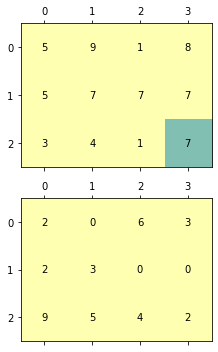

In [9]:
# 선택한 텐서를 시각화 한다.
mask = torch.ones_like(x)
mask[0, 2, 3] = 0
draw_tensor(mask, x)

"a:b" 콜론을 사용하면 a번 원소부터 b번 원소 이전(b 비포함)까지 선택한다. a를 생략하면 a=0 이 되고, b를 생략하면 b=해당 차원의 크기가 된다. 만약 a,b 아무런 숫자를 쓰지 않는다면(":") 해당차원의 모든 원소를 선택하는 것이다.

첫번째 차원의 0번 원소, 두번째 차원의 2번 원소 이전까지(0번, 1번 원소), 세번째 차원의 3번 원소를 선택하려면 다음과 같이 한다.

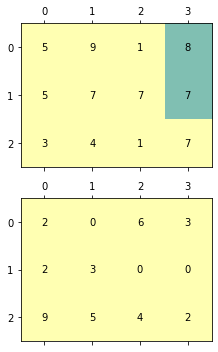

In [10]:
# 선택한 텐서를 시각화 한다.
mask = torch.ones_like(x)
mask[0, :2, 3] = 0
draw_tensor(mask, x)

In [11]:
x[0, 2, 1:]

tensor([4, 1, 7])

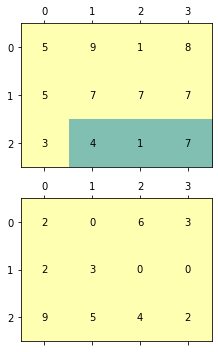

In [12]:
mask = torch.ones_like(x)
mask[0, 2, 1:] = 0
draw_tensor(mask, x)

In [13]:
x[0, 2, 1:2]

tensor([4])

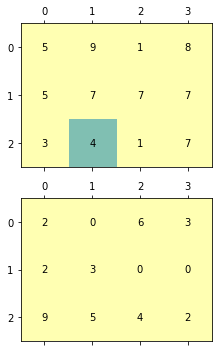

In [14]:
mask = torch.ones_like(x)
mask[0, 2, 1:2] = 0
draw_tensor(mask, x)

In [15]:
x[0, 2, :]

tensor([3, 4, 1, 7])

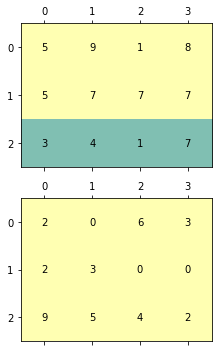

In [16]:
mask = torch.ones_like(x)
mask[0, 2, :] = 0
draw_tensor(mask, x)

### **뷰(view)**

텐서의 크기를 알맞게 변화해야할 때 자주 사용한다. 변화되는 차원 크기의 총 곱은 원래 텐서의 차원 크기의 총 곱이 되어야 한다.

In [17]:
x.size()

torch.Size([2, 3, 4])

original tensor:  torch.Size([2, 3, 4])


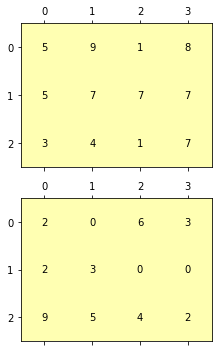

reshaped tensor:  torch.Size([2, 3, 4])


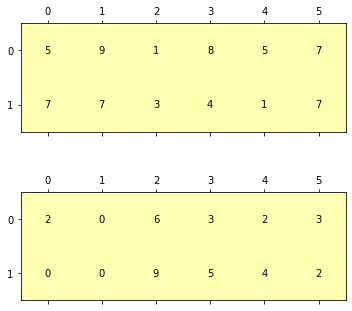

In [18]:

# 크기가 (2, 3, 4) 3차원 텐서를 (2, 2, 6) 으로 변경
x_viewed1 = x.view(2, 2, 6)

# 텐서 시각화
print("original tensor: ", x.size())
mask = torch.ones_like(x)
draw_tensor(mask, x)

print("reshaped tensor: ", x.size())
mask = torch.ones_like(x_viewed1)
draw_tensor(mask, x_viewed1)

"-1" 를 사용하면 나머지 차원을 알아서 계산 해준다. 단 2 곳 이상 동시에 사용할 수 없다.

original tensor:  torch.Size([2, 3, 4])


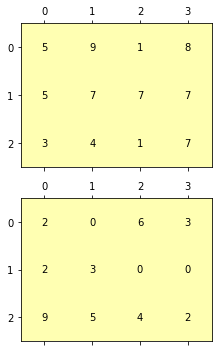

reshaped tensor:  torch.Size([2, 1, 12])


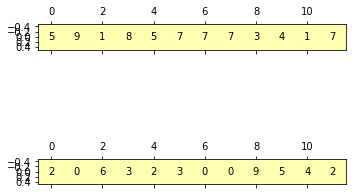

In [19]:
# 크기가 (2, 3, 4) 3차원 텐서를 (2, 1, 12) 으로 변경
x_viewed2 = x.view(-1,1, 12)
# 1,12 고정되면 -1이 자동적으로 설정

# 텐서 시각화
print("original tensor: ", x.size())
mask = torch.ones_like(x)
draw_tensor(mask, x)

print("reshaped tensor: ", x_viewed2.size())
mask = torch.ones_like(x_viewed2)
draw_tensor(mask, x_viewed2)

view와 reshape의 memory copy부분 예시

In [20]:
a = torch.zeros(3, 2)
b = a.view(2, 3)
a.fill_(1) 

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [21]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [22]:
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [23]:
a = torch.zeros(3, 2) 
b = a.t().reshape(6)  # 보장x
a.fill_(1) 

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [24]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [25]:
b

tensor([0., 0., 0., 0., 0., 0.])

## 텐서 인덱싱(Indexing)

``` python
[[1  2]
 [3  4]] 2차원 텐서에서 [1  3]이라는 값을 가져오고 싶어요!
```
tensor를 원하는 모양으로 바꾸고 싶을 때, `torch.Tensor.view`라는 함수를 사용하면 됩니다.

In [31]:
A = torch.Tensor([[1, 2],
                  [3, 4]])

# [1, 3]만 출력해봅시다.

# torch.index_select 함수를 써서 해보세요!
output = torch.index_select(A, 1, torch.tensor([0])) # 입력텐서 , axis, index
output = output.view(-1)
output

tensor([1., 3.])

In [33]:
# 파이썬 리스트 인덱싱과 비슷한 방법으로 해보세요!
output = A[:, 0]
output

tensor([1., 3.])

### **permute**

차원의 위치를 바꿀때 주로 사용한다. 텐서 전체 모양을 바꿀 때 유용하게 쓰인다.

original tensor:  torch.Size([2, 3, 4])


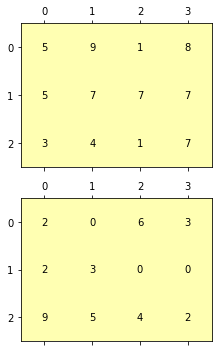

reshaped tensor torch.Size([4, 3, 2])


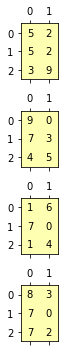

In [34]:
# (2, 3, 4) 크기 텐서의 차원 크기를 (4, 3, 2)로 바꾼다. rank, shape
x_permuted = x.permute(2, 1, 0)

# 텐서 시각화
print("original tensor: ", x.size())
mask = torch.ones_like(x)
draw_tensor(mask, x)

print("reshaped tensor", x_permuted.size())
mask = torch.ones_like(x_permuted)
draw_tensor(mask, x_permuted)

### **transpose**

`permute`의 특별한 케이스다, 주로 두 개 차원을 교환하여 바꿀때 사용된다.

original tensor:  torch.Size([2, 3, 4])


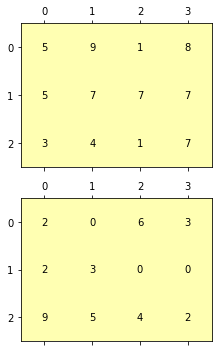

reshaped tensor torch.Size([3, 2, 4])


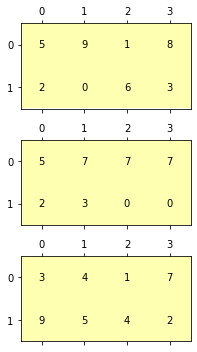

In [35]:
# (2, 3, 4) 크기 텐서의 첫번째 차원과 두번째 차원이 바뀐다.
x_transposed =x.transpose(0,1)

# 텐서 시각화
print("original tensor: ", x.size())
mask = torch.ones_like(x)
draw_tensor(mask, x)

print("reshaped tensor", x_transposed.size())
mask = torch.ones_like(x_transposed)
draw_tensor(mask, x_transposed)

### **squeeze & unsqueeze**

* squeeze: 텐서의 크기가 1인 차원을 지워버린다. 숫자를 특정하면 해당 차원의 크기가 1일 경우 지우고 아니면 그냥 둔다.
* unsqueeze: 해당하는 숫자 차원에 크기 1인 차원을 늘린다. `np.newaxis` 와 비슷한 역할

In [36]:
x = torch.rand((2, 1, 3, 4, 1)) 
print(x.size())
print(x.squeeze().size())

torch.Size([2, 1, 3, 4, 1])
torch.Size([2, 3, 4])


In [37]:
# 크기가 (2, 1, 3, 4, 1) 인 5차원 텐서를 생성한다
x = torch.rand((2, 1, 3, 4, 1))
print(x.size())

# 모든 차원에서 크기가 1인 차원을 squeeze 한다.
print(x.squeeze().size())  # 크기확인

# 두번째 차원(크기 = 1)을 squeeze 한다.
print(x.squeeze(1).size())  # 크기확인

# 4번째 차원에 크기를 1 추가, 6차원 텐서가 된다.
print(x.unsqueeze(3).size())  # 크기확인

torch.Size([2, 1, 3, 4, 1])
torch.Size([2, 3, 4])
torch.Size([2, 3, 4, 1])
torch.Size([2, 1, 3, 1, 4, 1])


### **cat & stack**

두 텐서 혹은 그 이상을 합치는 역할을 담당한다.

In [38]:
# helper function
def draw_tensor2(x):
    """tensor drawing cat&stack"""
    subplot_size = 1 if x.ndimension() <= 2 else x.size(0)
    fig, axes = plt.subplots(subplot_size, 1)
    if subplot_size == 1: 
        axes.matshow(x.numpy(), vmin=0, vmax=1, cmap='summer')
    else:
        for i in range(subplot_size):
            axes[i].matshow(x.numpy()[i], vmin=0, vmax=1, cmap='summer')
    plt.show()

`cat` 의 경우 텐서를 "합친다"라는 느낌이 강하다. 지정한 차원 방향으로 크기를 합친다고 생각할 수 있다. 다만 지정되지 않은 다른 차원의 크기는 두 텐서가 같아야 한다.

tensor([[0.0819, 0.4911, 0.4033],
        [0.3859, 0.8813, 0.8811]])
tensor([[0.7242, 0.5033, 0.8249],
        [0.2634, 0.3112, 0.5948]])
tensor([[0.0819, 0.4911, 0.4033],
        [0.3859, 0.8813, 0.8811],
        [0.7242, 0.5033, 0.8249],
        [0.2634, 0.3112, 0.5948]])


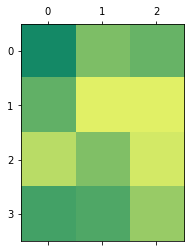

In [39]:
torch.manual_seed(777)
# 크기가 (2, 3) 인 A, B 텐서를 만든다
A = torch.rand((2, 3))
B = torch.rand((2, 3))

# 첫번째 차원을 기준으로 텐서를 concatenate 한다.
AB_cated = torch.cat([A, B], dim=0)
print(A)
print(B)
print(AB_cated)

# 시각화
draw_tensor2(AB_cated)

`stack`은 텐서들을 "쌓는다"라는 느낌이 강하다. 각 리스트 안에 있는 지정된 차원을 `unsqueeze` 한 다음 `cat`을 사용하는 것과 같다.

In [43]:
print(A.size())
print(B.size())
print(AB_stacked.size())

torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([2, 2, 3])


torch.stack([A, B], dim=0)

tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])
----------------------------------------
torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)

tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])


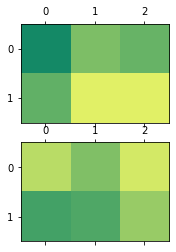

In [40]:
# 첫번째 차원을 기준으로 텐서를 stack 한다.
AB_stacked = torch.stack([A, B], dim=0)
print("torch.stack([A, B], dim=0)\n")
print(AB_stacked)
print("----"*10)
print("torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)\n")
# 각 텐서를 첫번째 차원 기준으로 unsqueeze 후, cat 한것과 같은 결과
AB_unsqueeze_cat = torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)
print(AB_unsqueeze_cat)

# 시각화
draw_tensor2(AB_stacked)

## 텐서의 사칙연산: add / multiplication

### **텐서의 덧셈과 뺄셈**

$$\begin{aligned}
x = \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}\quad y = \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix}
\end{aligned}$$

벡터와 스칼라 연산: broadcasting 이 적용된다.

$$\begin{aligned}
x + 2 &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} + 2 = \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} + 2*\begin{bmatrix}1 \\ 1 \\ 1 \end{bmatrix} \\
&= \begin{bmatrix}1+2 \\ 2+2 \\ 3+2 \end{bmatrix} = \begin{bmatrix}3 \\ 4 \\ 5 \end{bmatrix}
\end{aligned}$$

벡터와 벡터간 연산

$$\begin{aligned}
x + y &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix}1+4 \\ 2+5 \\ 3+6 \end{bmatrix} = \begin{bmatrix}5 \\ 7\\ 9 \end{bmatrix}
\end{aligned}$$

In [44]:
# x, y 크기가 3인 1차원 벡터 생성
x = torch.Tensor([1, 2, 3])
y = torch.Tensor([4, 5, 6])

# 같은 크기의 벡터간 덧셈
print(torch.add(x, y))

# 같은 크기의 벡터간 뺄셈
print(torch.sub(x, y))

# 벡터 + 스칼라
print(x+2)

# 벡터 - 스칼라
print(x-2)

tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([3., 4., 5.])
tensor([-1.,  0.,  1.])


행렬 모양이 다르면 당연히 연산이 되지 않는다.

In [45]:
n1 = np.arange(10).reshape(2,5)
n2 = np.arange(10).reshape(5,2)
t1 = torch.FloatTensor(n1)
t2 = torch.FloatTensor(n2)

In [47]:
t1.size()

torch.Size([2, 5])

In [48]:
t2.size()

torch.Size([5, 2])

In [46]:
t1 + t2

RuntimeError: ignored

### **텐서의 곱셈**

원소간 곱셈(element-wise product) : $*$, $\odot$

$$\begin{aligned}
x * y &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} * \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix}1*4 \\ 2*5 \\ 3*6 \end{bmatrix} = \begin{bmatrix}4 \\ 10 \\ 18 \end{bmatrix}
\end{aligned}$$

In [ ]:
# 곱셈
print(x * y)
print(torch.mul(x, y))

# 나눗셈
print(x / y)
print(torch.div(x, y))

내적(inner product) 혹은 점곱(dot product): $\cdot$

$$\begin{aligned}
x\cdot y = x^T y = \sum_i^N x_i * y_i &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}^T \cdot \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \end{bmatrix}\begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} \\
&= 1 \times 4 + 2 \times 5 + 3 \times 6 = 4+10+18 = 32
\end{aligned}$$

In [ ]:
print("inner product: ")
print(torch.dot(x, y))
print(x.dot(y)) # 벡터간의 내적 곱

### **행렬의 곱셈(matrix product)**

$$\begin{aligned}
X &= \begin{bmatrix}x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \end{bmatrix} = \begin{bmatrix}1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix} 
\\ 
Y &= \begin{bmatrix}y_{11} & y_{12} \\ y_{21} & y_{22}\end{bmatrix} = \begin{bmatrix}7 & 9 \\ 8 & 10 \end{bmatrix}
\end{aligned}$$

X의 크기 (3, 2), Y의 크기 (2, 2) 

$$\begin{aligned}
X\cdot Y 
&= \begin{bmatrix}1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix} \begin{bmatrix}7 & 9 \\ 8 & 10 \end{bmatrix} \\
&= \begin{bmatrix}
x_{1:}\cdot y_{:1} & \ x_{1:}\cdot y_{:2} \\
x_{2:}\cdot y_{:1} & \ x_{2:}\cdot y_{:2} \\
x_{3:}\cdot y_{:1} & \ x_{3:}\cdot y_{:2}
\end{bmatrix}
= \begin{bmatrix}
1\times 7 + 4 \times 8 & 1 \times 9 + 4 \times 10 \\
2\times 7 + 5 \times 8 & 2 \times 9 + 5 \times 10 \\
3\times 7 + 6 \times 8 & 3 \times 9 + 6 \times 10
\end{bmatrix}
\end{aligned}$$

In [49]:
# (3, 2) 크기의 X 텐서와 (2, 2) 크기의 Y 텐서를 생성한다.
X = torch.Tensor([[1, 4], 
                  [2, 5], 
                  [3, 6]])

Y = torch.Tensor([[7, 9], 
                  [8, 10]])

# 행렬의 곱셈을 한다.
print(torch.mm(X, Y)) # broadcast를 지원 X, 디버깅할 때 용이!
print()
print(X.mm(Y))

tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])

tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])


torch.mm과 torch.matmul 동일한 연산을 수행 결과값도 같다

In [50]:
n1 = np.arange(10).reshape(2,5)
t1 = torch.FloatTensor(n1)

In [51]:
n2 = np.arange(10).reshape(5,2)
t2 = torch.FloatTensor(n2)

t1.mm(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [53]:
print(t1.size(), t2.size())


torch.Size([2, 5]) torch.Size([5, 2])


In [52]:
t1.dot(t2) # dot은 1차원 벡터 내적곱에만 적용이 된다.

RuntimeError: ignored

In [ ]:
t1.matmul(t2) # broadcast가 지원이 됨.

broadcast가 안되는 예시

In [54]:
a = torch.rand(5,2,3)
b = torch.rand(3)
a.mm(b) # broadcast가 안됩니다!

RuntimeError: ignored

In [55]:
a = torch.rand(5,2,3) 
b = torch.rand(3)
a.matmul(b) # broadcast가 지원이 됨!

tensor([[0.1207, 0.6795],
        [0.4020, 0.8700],
        [0.8628, 0.7616],
        [0.4703, 0.7698],
        [0.6747, 0.2543]])

In [56]:
a.matmul(b).shape 

torch.Size([5, 2])

matmul은 a의 연산을 하나하나 떼어나서 mm연산한 것과 같다.

In [59]:
a.size()

torch.Size([5, 2, 3])

In [57]:
a[0].mm(torch.unsqueeze(b,1)).squeeze()

tensor([0.1207, 0.6795])

In [60]:
a[1].mm(torch.unsqueeze(b,1))

tensor([[0.4020],
        [0.8700]])

In [61]:
a[2].mm(torch.unsqueeze(b,1))

tensor([[0.8628],
        [0.7616]])

In [62]:
a[3].mm(torch.unsqueeze(b,1))

tensor([[0.4703],
        [0.7698]])

In [63]:
a[4].mm(torch.unsqueeze(b,1))

tensor([[0.6747],
        [0.2543]])

## 기초연산: 

### **sum / mean**

$$Z = \begin{aligned}
\begin{bmatrix}1 & 2 \\ 3 & 4 \end{bmatrix}\\
\begin{bmatrix}5 & 6 \\ 7 & 8 \end{bmatrix}
\end{aligned}$$

In [64]:
# (2, 2, 2) 크기의 3차원 텐서 Z 를 생성한다.
Z = torch.Tensor([[[1, 2], 
                   [3, 4]],
                  
                  [[5, 6], 
                   [7, 8]]])

# 텐서의 모든 원소의 합 혹은 평균을 구한다.
Z_sum = torch.sum(Z)
Z_mean = torch.mean(Z)

print(f"sum: {Z_sum}")
print(f"mean: {Z_mean}")

sum: 36.0
mean: 4.5


차원을 지정해주면, 해당 차원을 축소하면서 합(평균)을 구한다.

$$\begin{aligned} 
sum(Z, dim=0) &= \begin{bmatrix}1+5 & 2+6 \\ 3+7 & 4+8 \end{bmatrix}= \begin{bmatrix}6 & 8 \\ 10 & 12 \end{bmatrix} \\
sum(Z, dim=1) &= \begin{bmatrix}1+3 & 2+4 \\ 5+7 & 6+8 \end{bmatrix}= \begin{bmatrix}4 & 6 \\ 12 & 14 \end{bmatrix} \\
sum(Z, dim=2) &= \begin{bmatrix}1+2 & 3+4 \\ 5+6 & 7+8 \end{bmatrix}= \begin{bmatrix}3 & 7 \\ 11 & 15 \end{bmatrix} \\
\end{aligned}$$

In [65]:
print(torch.sum(Z, dim=0))
print()
print(torch.mean(Z, dim=0))

tensor([[ 6.,  8.],
        [10., 12.]])

tensor([[3., 4.],
        [5., 6.]])


### max & argmax / min & argmin 

In [66]:
# 텐서의 모든 원소중 최대값 및 최대값의 위치 구하기
print("Z max:", torch.max(Z))
print("Z argmax:", torch.argmax(Z))

# 텐서의 모든 원소중 최소값 및 최소값의 위치 구하기
print("Z min:", torch.min(Z))
print("Z argmin:", torch.argmin(Z))

Z max: tensor(8.)
Z argmax: tensor(7)
Z min: tensor(1.)
Z argmin: tensor(0)


차원 지정시 지정된 차원을 기준으로 차원이 축소 되면서 최대값 및 위치 혹은 최소값 및 위치를 가진 튜플(tuple)을 반환한다.


$$max(Z, dim=1)=
\begin{aligned}
\begin{bmatrix} 
max\begin{pmatrix} 1\\ 3 \end{pmatrix} & max\begin{pmatrix} 2\\ 4 \end{pmatrix} \end{bmatrix} \\
\begin{bmatrix}
max\begin{pmatrix} 5\\ 7 \end{pmatrix} & max\begin{pmatrix} 6\\ 8 \end{pmatrix}
\end{bmatrix} 
\end{aligned}
= \begin{bmatrix} 3 & 4 \\ 7 & 8 \end{bmatrix}
$$

In [67]:
Z_max, Z_argmax = torch.max(Z, dim=1)
Z_min, Z_argmin = torch.min(Z, dim=1)
print("Z max:\n", Z_max)
print("Z argmax:\n", Z_argmax)
print()
print("Z min:\n", Z_min)
print("Z argmin:\n", Z_argmin)

Z max:
 tensor([[3., 4.],
        [7., 8.]])
Z argmax:
 tensor([[1, 1],
        [1, 1]])

Z min:
 tensor([[1., 2.],
        [5., 6.]])
Z argmin:
 tensor([[0, 0],
        [0, 0]])


### 논리연산

In [68]:
# 크기가 3인 벡터를 생성
z = torch.Tensor([-3, 2, 0])

# 0과 같다
print("equal to 0")
print(z.eq(0))
print(z == 0)
print()

# 0 보다 크거나 같다
print("great than or equal to 0")
print(z.ge(0))
print(z >= 0)
print()

# 0보다 크다
print("great than 0")
print(z.gt(0))
print(z > 0)
print()

# 0보다 작거나 같다
print("less than or equal to 0")
print(z.le(0))
print(z <= 0)
print()

# 0보다 작다
print("less than 0")
print(z.lt(0))
print(z < 0)

equal to 0
tensor([False, False,  True])
tensor([False, False,  True])

great than or equal to 0
tensor([False,  True,  True])
tensor([False,  True,  True])

great than 0
tensor([False,  True, False])
tensor([False,  True, False])

less than or equal to 0
tensor([ True, False,  True])
tensor([ True, False,  True])

less than 0
tensor([ True, False, False])
tensor([ True, False, False])


# Coding Part

두 벡터 $w$와 $x$, 스칼라 $b$ 가 있다. 함수`function`를 작성해보자!

1. 두 벡터(x, w)의 내적 값에 b를 더해서 z값을 구한다. 
2. z값이 0 보다 크면 1, 0과 같거나 작으면 0 을 반환한다. 

$$\begin{aligned}
w = \begin{bmatrix} 0.7 \\ 0.7 \end{bmatrix}, \quad b = \begin{bmatrix} -0.5 \end{bmatrix}, \quad x = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\end{aligned}$$

3. check 함수에서 b가 스칼라 값을 갖도록 하는 조건을 작성한다.

In [69]:
def function(x, w, b):
    check(w, b)
    # 1. 두 벡터의 내적 + b
    """write your code"""
    z = torch.dot(x, w) + b
    
    # 2. 0 보다 크면 1, 작거나 같으면 0 반환 
    """write your code"""
    if z > 0:
        return 1
    else:
        return 0
    return 1 if z > 0 else 0 #  한줄 작성도 가능

def check(w, b):
    assert len(w) == 2, "w에 두 개의 숫자가 필요합니다."

    # 3. True condition
    assert (b.dim() == 1) and (len(b)==1), "b는 스칼라 값이어야 합니다."
    

In [70]:
x = torch.FloatTensor([0, 1])
w = torch.FloatTensor([0.7, 0.7])
b = torch.FloatTensor([-0.5])

function(x, w, b)

1

In [71]:
print(x)

tensor([0., 1.])


In [72]:
print(w)

tensor([0.7000, 0.7000])


In [73]:
print(z)

tensor([-3.,  2.,  0.])


In [74]:
print("CPu seed in pytorch: ", torch.initial_seed())
print("GPU seed in pytorch: ", torch.cuda.initial_seed())

torch.manual_seed(5010072140289196)

print("CPu seed in pytorch: ", torch.initial_seed())
print("GPU seed in pytorch: ", torch.cuda.initial_seed())

CPu seed in pytorch:  777
GPU seed in pytorch:  777
CPu seed in pytorch:  5010072140289196
GPU seed in pytorch:  5010072140289196


In [75]:
print("Current CPU random seed", torch.initial_seed())

Current CPU random seed 5010072140289196


In [76]:
print("Current CUDA random seed", torch.cuda.initial_seed())

Current CUDA random seed 5010072140289196


In [77]:
torch.manual_seed(1514780611)

In [78]:
torch.cuda.manual_seed_all(7053313890570024)

In [79]:
print("Current CPU random seed", torch.initial_seed())

Current CPU random seed 1514780611


In [80]:
print("Current CUDA random seed", torch.cuda.initial_seed())

Current CUDA random seed 7053313890570024
